<a href="https://colab.research.google.com/github/usma11dia0/training_of_kaggle/blob/main/google-colab/titanic_udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns

from pandas import Series, DataFrame
from collections import Counter

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# データ読み込み
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/titanic_machine-learning-from-disaster/data/train.csv')
test_df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/titanic_machine-learning-from-disaster/data/test.csv')
gender_submission_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/titanic_machine-learning-from-disaster/data/gender_submission.csv')

In [ ]:
# データフレーム確認
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# データ概要確認
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 練習  
1.   タイタニック号の乗客はどのような人達だったのか？
2.   それぞれの乗客はどのデッキにいたのか？ また客室の種類とどのような関係にあったか？
3.   乗客は主にどこから来たのか？
4.   家族連れか、単身者か？
5.   沈没からの生還者にはどのような要因があったのか？

**1.タイタニック号の乗客はどのような人達だったのか？**

In [ ]:
# 乗客の男女別
titanic_df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

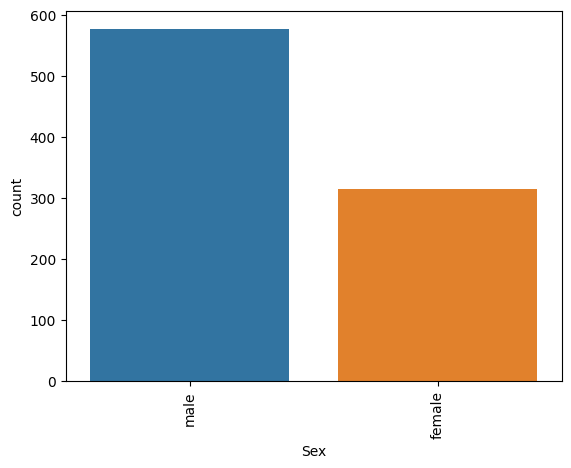

In [ ]:
# 乗客の男女別プロット(通常)
titanic_df['Sex'].value_counts().plot(kind='bar')

# 乗客の男女別プロット(seaborn)
sns.countplot(data=titanic_df, x='Sex')

<Axes: xlabel='Sex', ylabel='count'>

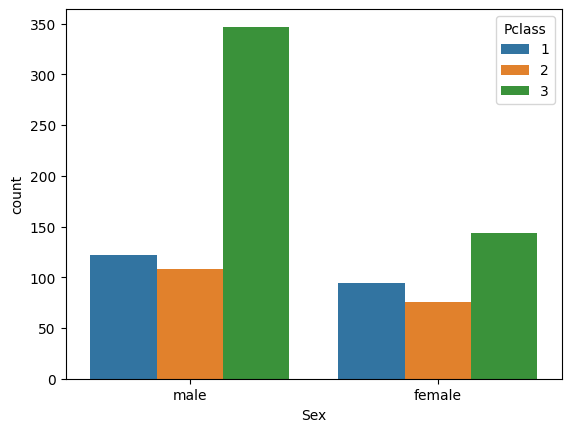

In [ ]:
# 乗客の男女別を客室で層別化
sns.countplot(titanic_df, x='Sex', hue='Pclass')

<Axes: xlabel='Pclass', ylabel='count'>

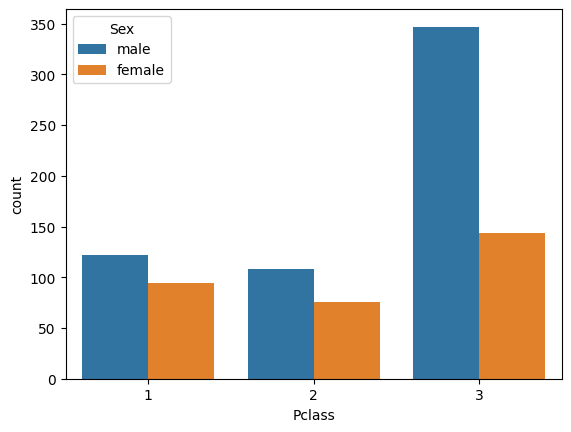

In [ ]:
# 乗客の客室を性別で層別化
sns.countplot(titanic_df, x='Pclass', hue='Sex')

上記より3等客室は女性に比べて、男性が圧倒的に多いことが分かる。  
次に子供という概念を導入して客層をさらに調べてみる。

In [ ]:
# 16歳未満を子供として、personという新しい列を追加する。
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

# 最初の10行を確認
titanic_df.iloc[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [ ]:
# person列の項目小計を求める
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

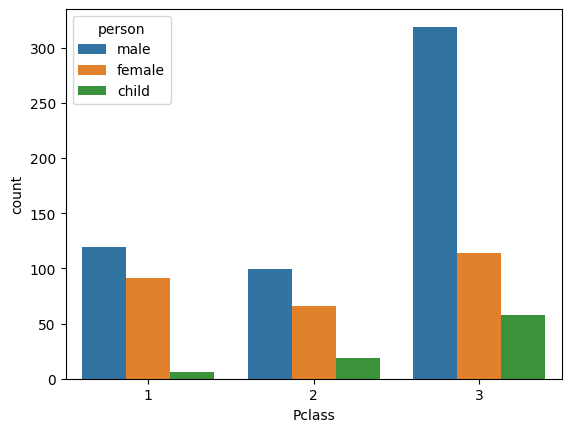

In [ ]:
# 乗客の客室をpersonで層別化
sns.countplot(titanic_df, x='Pclass', hue='person')

3等客室にたくさんの子供がいたのに、1等客室にはほとんど居ない。  
年齢に関する分布も詳しく見てみる

<Axes: >

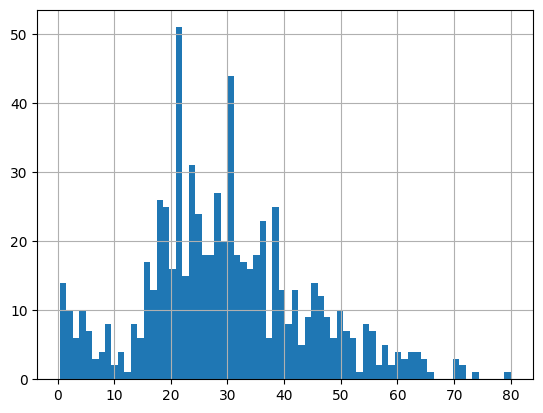

In [ ]:
# pandasでヒストグラムを描画する
titanic_df['Age'].hist(bins=70)

In [ ]:
# 平均年齢
titanic_df['Age'].mean()

29.69911764705882

<Axes: xlabel='Age', ylabel='Density'>

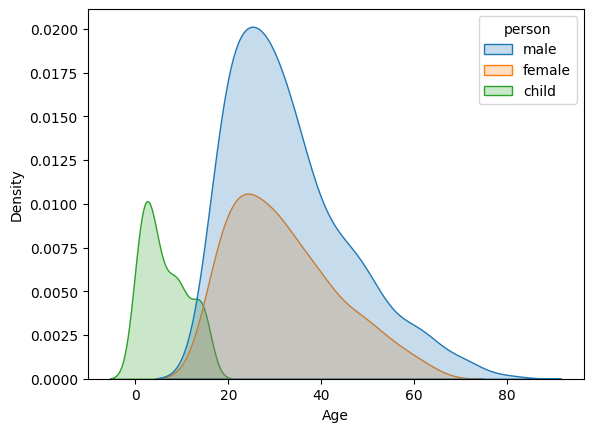

In [26]:
# カーネル密度推定のグラフを描画する
# ⇔ヒストグラムを曲線で近似

# 年齢をpersonで層別化したカーネル密度推定
sns.kdeplot(titanic_df, x='Age', hue='person', fill=True)

子供は乳幼児が多いことがグラフより分かる。

**２．それぞれの乗客はどのデッキにいたのか？また客室の種類とどのような関係にあったか？**

In [27]:
#データの概要を確認
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  person       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


Cabin列がそれぞれの乗客が居た場所だが、**NaN値が多いため除去**する。  
(891個のデータが無ければならないのに、nullでない値が204個しかない)

In [32]:
# NaNを消してdeckという新しいオブジェクト(Series)を作成する
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

最初の1文字だけあればどこにいたかが分かる → **ドメイン知識**も必要

<Axes: xlabel='Cabin', ylabel='count'>

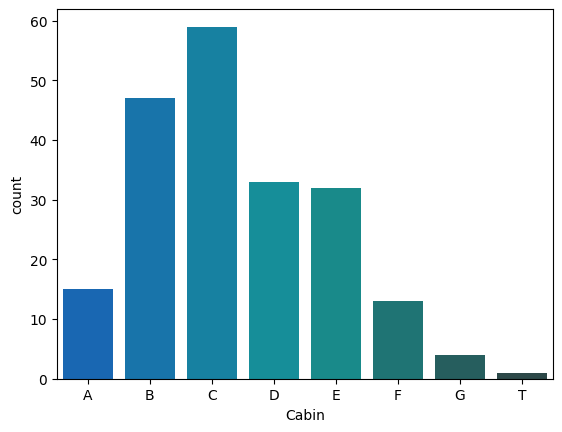

In [36]:
# deckの最初の1文字を抽出したリストを新たに作成
levels = [level[0] for level in deck]

# DataFrameを作成してプロットする。
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot(cabin_df,
              x='Cabin',
              palette='winter_d',
              order=sorted(set(levels)))

上記で乗客がどのデッキにいたかを可視化。  
'T'のように**明らかに数が少ない場合はデータが誤っている可能性がある**ため、**データの削除等を検討**する必要がある。

<Axes: xlabel='Cabin', ylabel='count'>

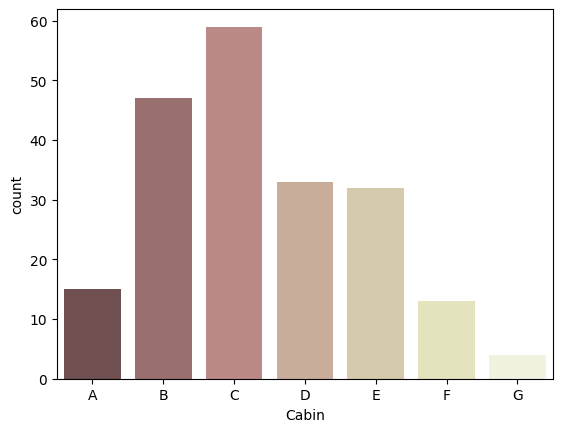

In [39]:
# T以外のデータだけから新しく図を作成する。
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']

sns.countplot(cabin_df,
              x='Cabin',
              palette='pink',
              order=sorted(set(cabin_df['Cabin'])))

**３．乗客は主にどこから来たのか？**

In [41]:
# データフレーム確認
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


乗船した場所を示す「Embarked」列にはC,Q,Sが含まれる。  
それぞれ何を示すかはKaggle > Data > Data Dictionaryを参照する。

In [46]:
# 欠損値がないか確認。
# ※ df.info()でも可能
Counter(titanic_df.Embarked)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

**※value_countsではnanの数が調べられない点に注意する。**

In [47]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

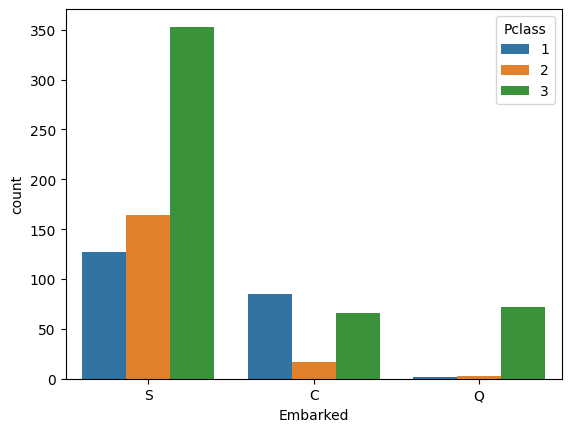

In [42]:
# Emberkedを客室クラスにより層別化し、ヒストグラムで可視化することで全体像を把握
sns.countplot(x='Embarked', data=titanic_df, hue='Pclass')

乗船した場所によって、客室が特徴づけられている。(特にQから乗船した人のほとんどが3等客室)